In [1]:
#download data and unzip
!wget -O  data/hymenoptera_data.zip https://download.pytorch.org/tutorial/hymenoptera_data.zip 
!unzip -n data/hymenoptera_data.zip -d data/


--2024-06-24 15:42:42--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 108.156.46.49, 108.156.46.30, 108.156.46.129, ...
Connecting to download.pytorch.org (download.pytorch.org)|108.156.46.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘data/hymenoptera_data.zip’

data/hymenoptera_da 100%[===================>]  45.10M  33.8MB/s    in 1.3s    

2024-06-24 15:42:43 (33.8 MB/s) - ‘data/hymenoptera_data.zip’ saved [47286322/47286322]

Archive:  data/hymenoptera_data.zip


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

In [3]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) 
    for x in ['train', 'val']}
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) 
    for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using device:', device)

Using device: cuda:0


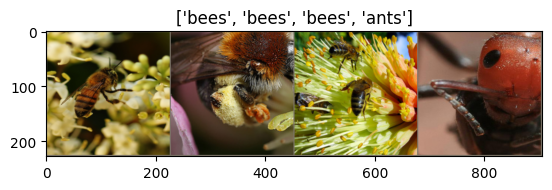

In [4]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [5]:
model = models.resnet18(weights='IMAGENET1K_V1')
num_features = model.fc.in_features
print('Num Features:', num_features)
#freeze layers
for param in model.parameters():
    param.requires_grad = False

num_classes = 2 # bees/ants
num_epochs = 15
lr = 0.03
model.fc = nn.Linear(num_features, num_classes) # replace the final layer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.fc.parameters(), lr=lr, momentum=0.9) # only training fc layer
# reduce learning rate by 0.1 every 5 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1) 

Num Features: 512


Using: cuda
Epoch 0/14
----------


train Loss: 13.9009 Acc: 140/244 = 0.5738


val Loss: 1.5117 Acc: 145/153 = 0.9477
New best accuracy: 0.948

Epoch 1/14
----------


train Loss: 7.5897 Acc: 191/244 = 0.7828


val Loss: 4.5419 Acc: 128/153 = 0.8366

Epoch 2/14
----------


train Loss: 9.2791 Acc: 180/244 = 0.7377


val Loss: 2.2695 Acc: 138/153 = 0.9020

Epoch 3/14
----------


train Loss: 6.8974 Acc: 194/244 = 0.7951


val Loss: 1.5617 Acc: 146/153 = 0.9542
New best accuracy: 0.954

Epoch 4/14
----------


train Loss: 6.3404 Acc: 193/244 = 0.7910


val Loss: 2.1819 Acc: 143/153 = 0.9346

Epoch 5/14
----------


train Loss: 4.4297 Acc: 209/244 = 0.8566


val Loss: 1.9755 Acc: 144/153 = 0.9412

Epoch 6/14
----------


train Loss: 3.1653 Acc: 202/244 = 0.8279


val Loss: 1.5551 Acc: 142/153 = 0.9281

Epoch 7/14
----------


train Loss: 4.0339 Acc: 196/244 = 0.8033


val Loss: 2.1100 Acc: 143/153 = 0.9346

Epoch 8/14
----------


train Loss: 1.3944 Acc: 221/244 = 0.9057


val Loss: 2.0477 Acc: 142/153 = 0.9281

Epoch 9/14
----------


train Loss: 3.9820 Acc: 201/244 = 0.8238


val Loss: 1.6797 Acc: 145/153 = 0.9477

Epoch 10/14
----------


train Loss: 2.4635 Acc: 204/244 = 0.8361


val Loss: 1.7163 Acc: 143/153 = 0.9346

Epoch 11/14
----------


train Loss: 2.2299 Acc: 213/244 = 0.8730


val Loss: 1.3954 Acc: 144/153 = 0.9412

Epoch 12/14
----------


train Loss: 2.8419 Acc: 200/244 = 0.8197


val Loss: 1.5222 Acc: 144/153 = 0.9412

Epoch 13/14
----------


train Loss: 3.5164 Acc: 202/244 = 0.8279


val Loss: 1.9297 Acc: 143/153 = 0.9346

Epoch 14/14
----------


train Loss: 2.2272 Acc: 209/244 = 0.8566


val Loss: 1.4800 Acc: 144/153 = 0.9412

Training complete in 0m 20s
Best val Acc: 0.954248


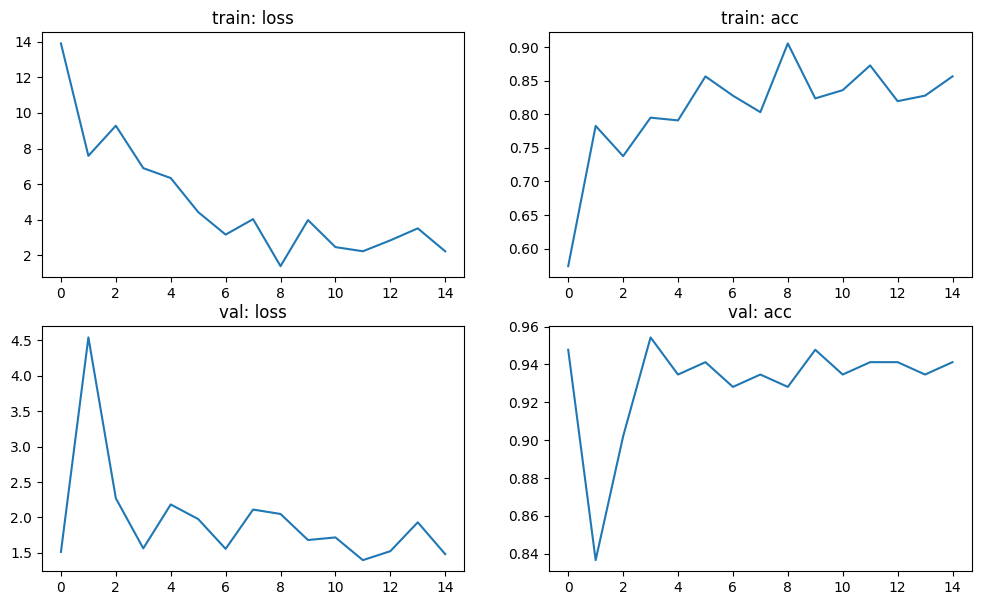

In [6]:
from utils.train import train_model

model, history = train_model(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=lr_scheduler,
    num_epochs=num_epochs,
    device='cuda',
    train_loader=dataloaders['train'],
    val_loader=dataloaders['val'])